In [1]:
import h2o
from h2o.automl import H2OAutoML
import pandas as pd



In [2]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,6 mins 34 secs
H2O_cluster_timezone:,Europe/Madrid
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.4
H2O_cluster_version_age:,14 days and 14 minutes
H2O_cluster_name:,root
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,968 Mb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [3]:
# Load the data
df1 = pd.read_csv("UNSW_NB15_training-set.csv")
df2 = pd.read_csv("UNSW_NB15_testing-set.csv")
train = h2o.H2OFrame(df1, header=1)
valid = h2o.H2OFrame(df2, header=1) 



#predictors and response
predictors = ["dur", "proto", "service", "state", "spkts", "dpkts", "sbytes", "dbytes", "rate", "sttl", "dttl", "sload", "dload", "sloss", "dloss", "sinpkt", "dinpkt", "sjit", "djit", "swin", "stcpb", "dtcpb", "dwin", "tcprtt", "synack", "ackdat", "smean","dmean","trans_depth","response_body_len","ct_srv_src","ct_state_ttl","ct_dst_ltm","ct_src_dport_ltm","ct_dst_sport_ltm","ct_dst_src_ltm","is_ftp_login","ct_ftp_cmd","ct_flw_http_mthd","ct_src_ltm","ct_srv_dst","is_sm_ips_ports"]
response = "label"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [8]:

#start AutoML only for DL and DRF models
aml = H2OAutoML(max_runtime_secs=600,
                seed=1234,  
                verbosity="info")

aml.train(x=predictors, y=response, training_frame=train, validation_frame=valid)

saving_model = None
saving_model = aml.leader



AutoML progress: |
20:35:22.238: Project: AutoML_2_20240723_203522
20:35:22.239: Blending will be used.
20:35:22.240: Setting stopping tolerance adaptively based on the training frame: 0.002388131628482626
20:35:22.243: Build control seed: 1234
20:35:22.245: Since cross-validation is disabled, and blending frame(s) were not provided, automatically split the training data into training, blending frame(s) in the ratio 80/0/20.
20:35:23.524: training frame: Frame key: AutoML_2_20240723_203522_training_Key_Frame__upload_872d1e7a9de84cf8e93e79732edb4aef.hex    cols: 45    rows: 140255  chunks: 9    size: 20103337  checksum: 5570330390316337659
20:35:23.525: validation frame: Frame key: Key_Frame__upload_872d09bfb98e86eb608ad0a13dc94ab8.hex    cols: 45    rows: 82332  chunks: 4    size: 10489433  checksum: 9092988188618458308
20:35:23.525: leaderboard frame: Frame key: Key_Frame__upload_872d09bfb98e86eb608ad0a13dc94ab8.hex    cols: 45    rows: 82332  chunks: 4    size: 10489433  checksum: 90

In [9]:
aml.leaderboard

model_id,rmse,mse,mae,rmsle,mean_residual_deviance
XGBoost_3_AutoML_2_20240723_203522,0.282625,0.0798768,0.140606,0.210899,0.0798768
GBM_1_AutoML_2_20240723_203522,0.283818,0.0805527,0.138689,0.211432,0.0805527
GBM_3_AutoML_2_20240723_203522,0.283981,0.0806454,0.138059,0.211906,0.0806454
GBM_2_AutoML_2_20240723_203522,0.284979,0.081213,0.139641,0.212244,0.081213
GBM_4_AutoML_2_20240723_203522,0.285385,0.0814445,0.139748,0.212062,0.0814445
DeepLearning_1_AutoML_2_20240723_203522,0.286072,0.0818373,0.194388,0.201738,0.0818373
StackedEnsemble_AllModels_1_AutoML_2_20240723_203522,0.286424,0.0820388,0.146226,0.213256,0.0820388
StackedEnsemble_BestOfFamily_1_AutoML_2_20240723_203522,0.286992,0.0823647,0.138451,0.21271,0.0823647
StackedEnsemble_AllModels_2_AutoML_2_20240723_203522,0.287447,0.0826256,0.147729,0.214023,0.0826256
StackedEnsemble_BestOfFamily_2_AutoML_2_20240723_203522,0.28758,0.0827021,0.14566,0.213846,0.0827021


# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

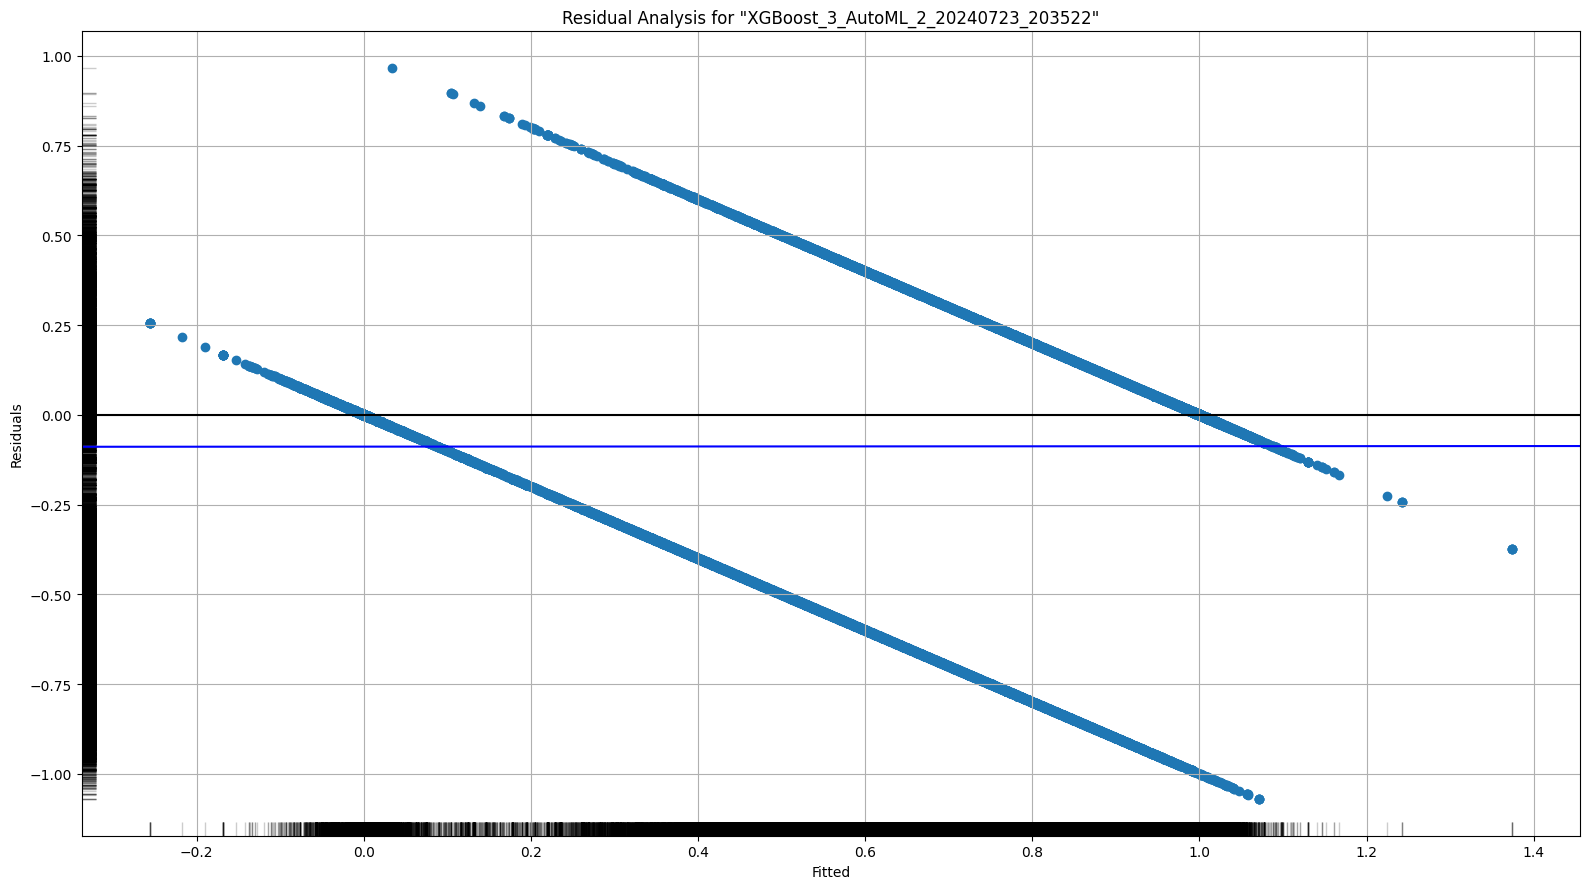

# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

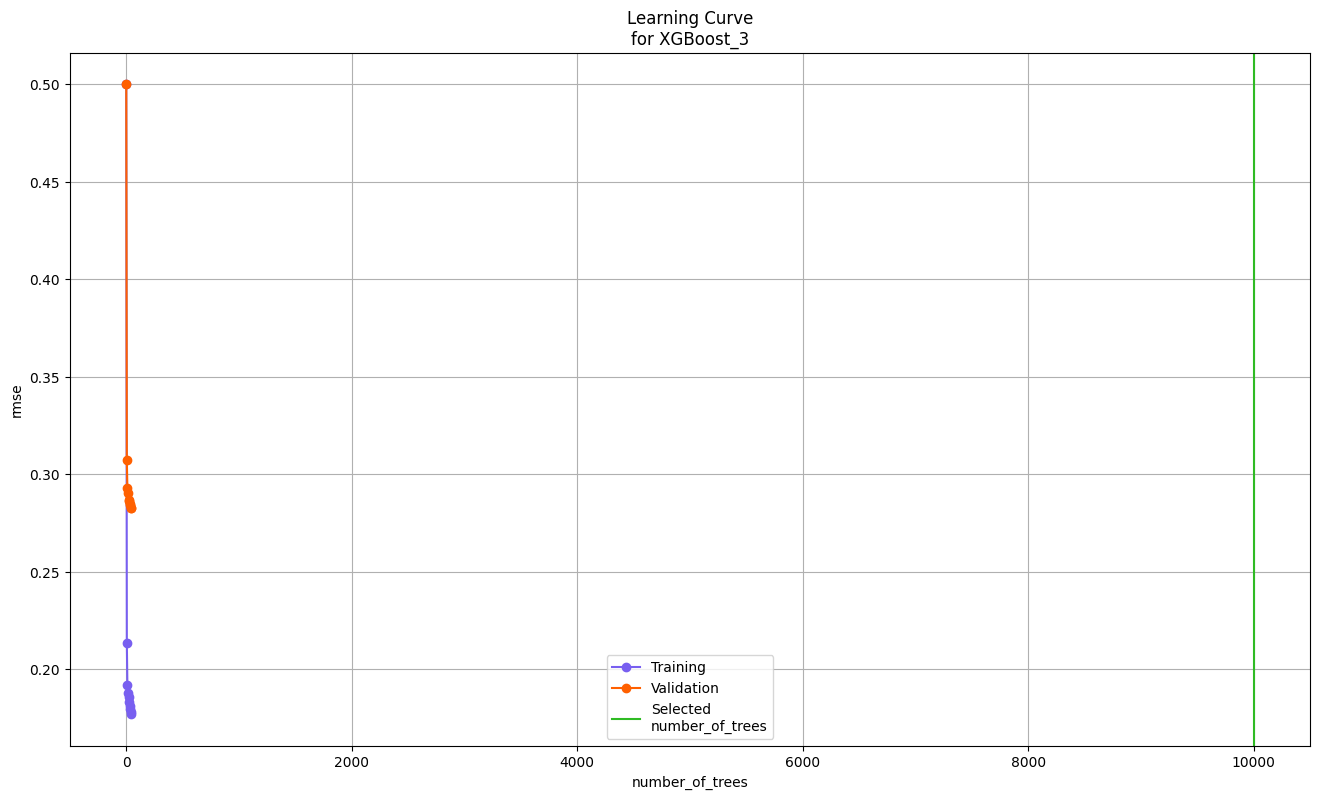

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

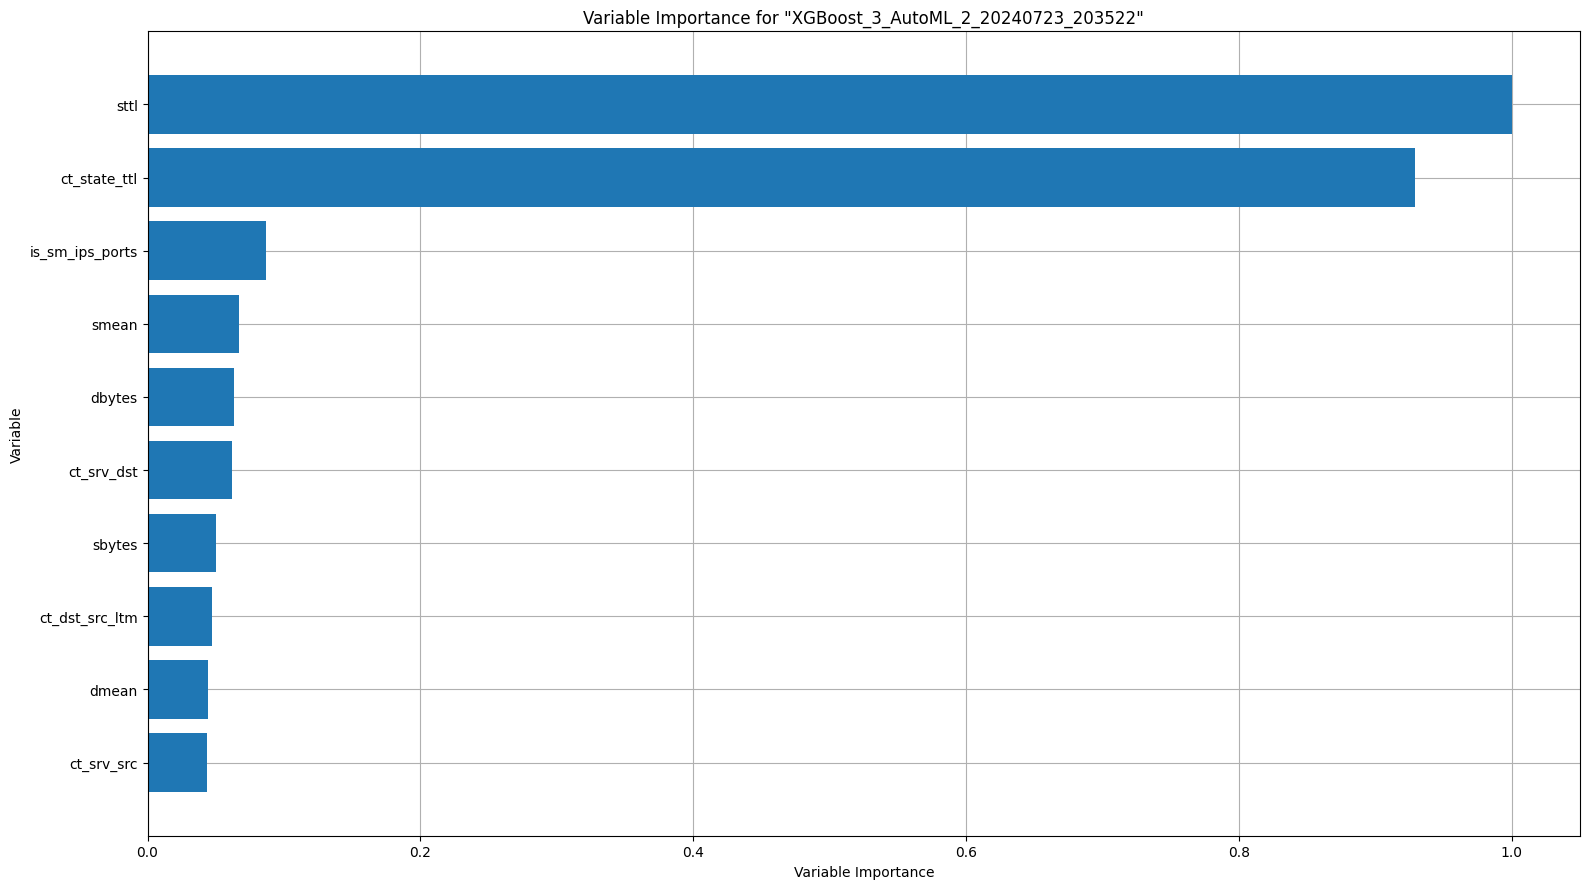

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

/home/markel/TFM Ciber/Prueba/venv/lib/python3.10/site-packages/h2o/job.py:81: UserWarning: Test/Validation dataset column 'state' has levels not trained on: ["ACC", "CLO"]
  warnings.warn(w)


H2OResponseError: Server error java.lang.IllegalArgumentException:
  Error: Incorrect number of arguments; 'cols_py' expects 2 but was passed 3
  Request: POST /99/Rapids
    data: {'ast': "(tmp= py_49_sid_9693 (levels (tmp= py_48_sid_9693 (as.factor (cols_py py_47_sid_9693 np.str_('proto'))))))", 'session_id': '_sid_9693'}


In [10]:
saving_model.explain(valid)

# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id,rmse,mse,mae,rmsle,mean_residual_deviance,training_time_ms,predict_time_per_row_ms,algo
XGBoost_3_AutoML_2_20240723_203522,0.282625,0.0798768,0.140606,0.210899,0.0798768,29102,0.004702,XGBoost
GBM_1_AutoML_2_20240723_203522,0.283818,0.0805527,0.138689,0.211432,0.0805527,47170,0.036684,GBM
GBM_3_AutoML_2_20240723_203522,0.283981,0.0806454,0.138059,0.211906,0.0806454,38013,0.035082,GBM
GBM_2_AutoML_2_20240723_203522,0.284979,0.081213,0.139641,0.212244,0.081213,58434,0.046224,GBM
GBM_4_AutoML_2_20240723_203522,0.285385,0.0814445,0.139748,0.212062,0.0814445,42764,0.042997,GBM
DeepLearning_1_AutoML_2_20240723_203522,0.286072,0.0818373,0.194388,0.201738,0.0818373,25681,0.007712,DeepLearning
StackedEnsemble_AllModels_1_AutoML_2_20240723_203522,0.286424,0.0820388,0.146226,0.213256,0.0820388,18570,0.178683,StackedEnsemble
StackedEnsemble_BestOfFamily_1_AutoML_2_20240723_203522,0.286992,0.0823647,0.138451,0.21271,0.0823647,9568,0.037845,StackedEnsemble
StackedEnsemble_AllModels_2_AutoML_2_20240723_203522,0.287447,0.0826256,0.147729,0.214023,0.0826256,10590,0.235874,StackedEnsemble
StackedEnsemble_BestOfFamily_2_AutoML_2_20240723_203522,0.28758,0.0827021,0.14566,0.213846,0.0827021,7534,0.057842,StackedEnsemble


# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

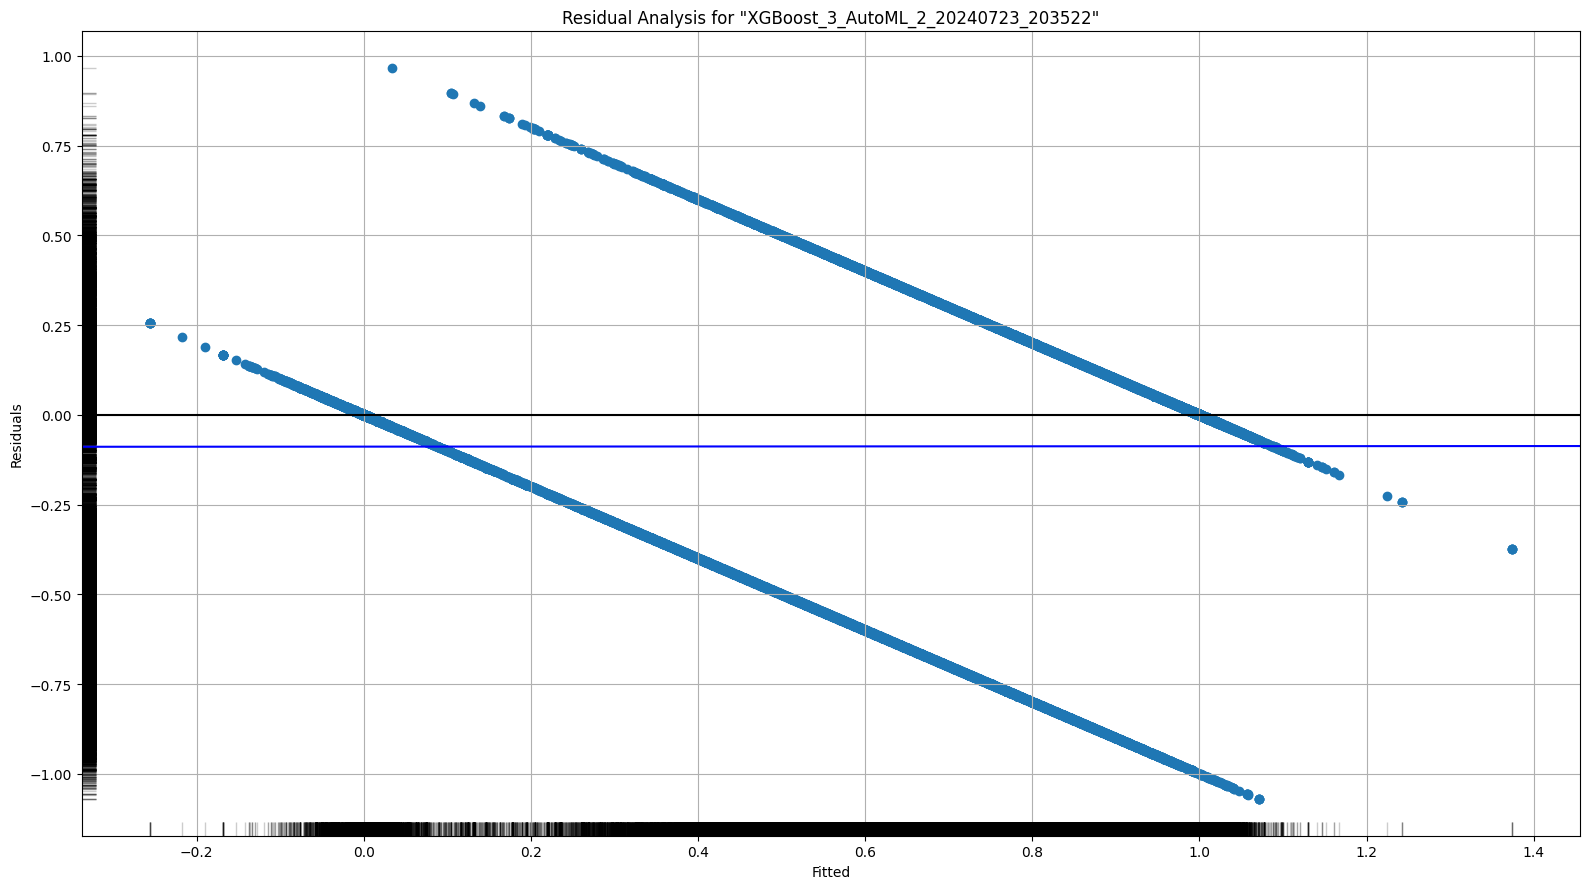

# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

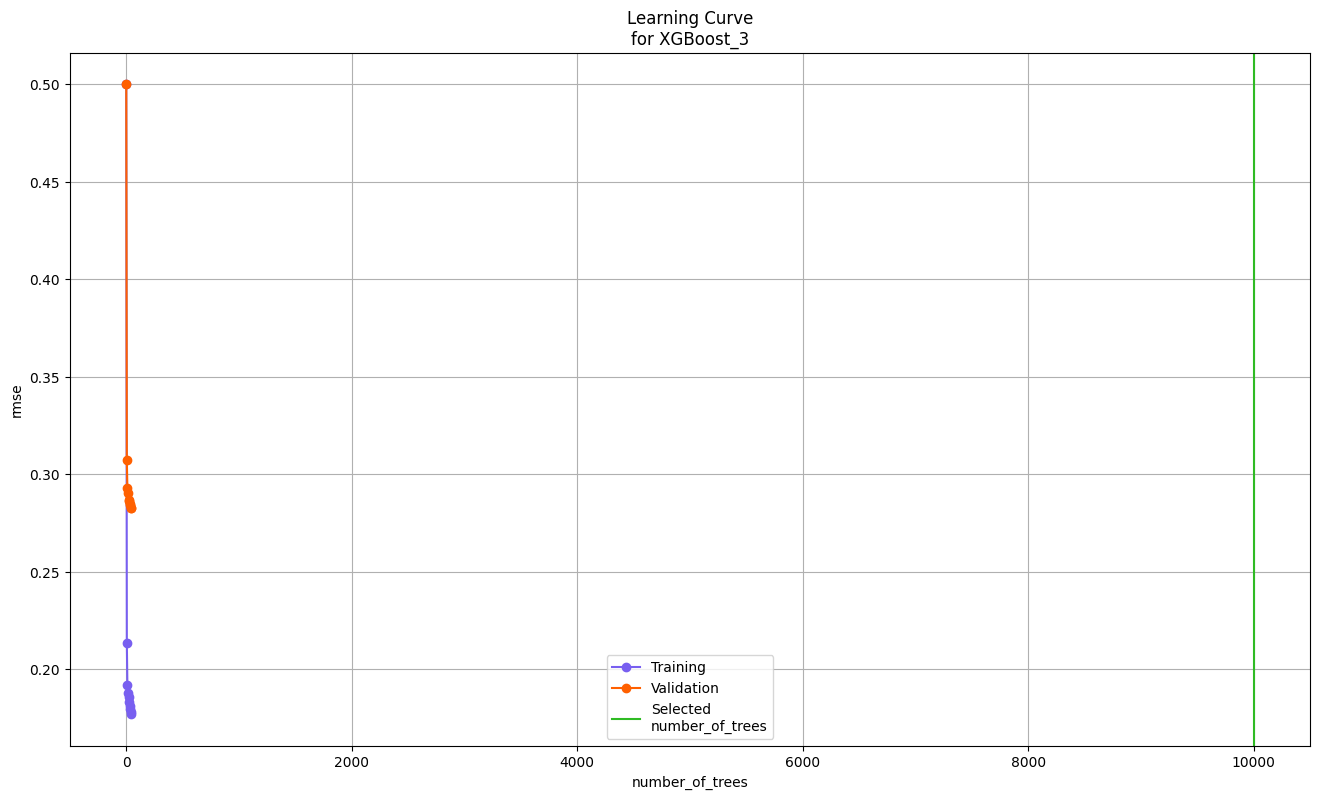

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

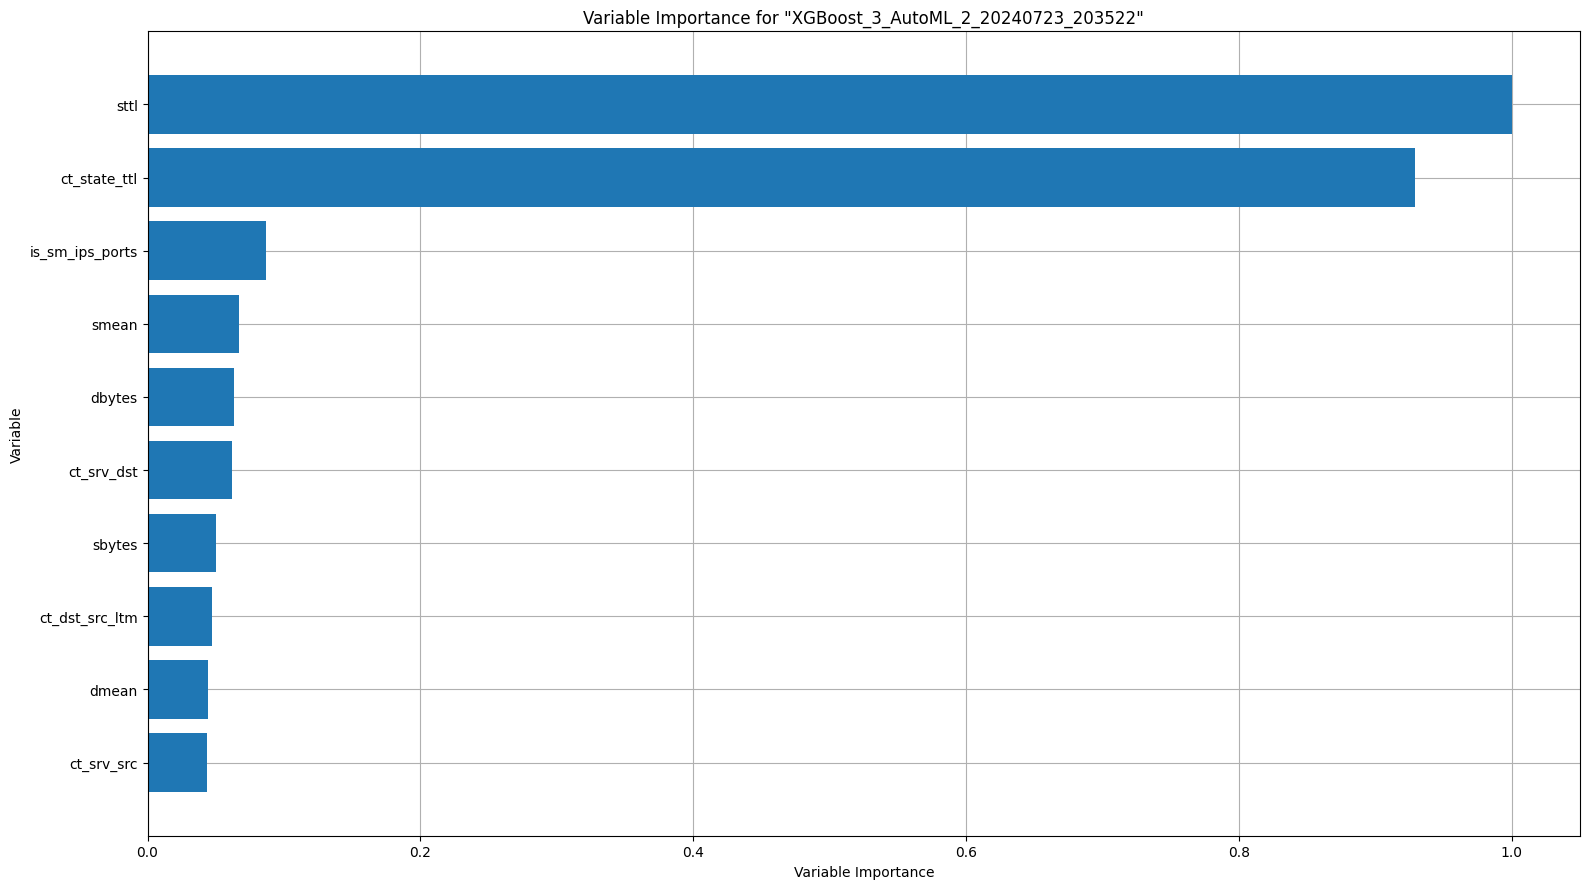

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

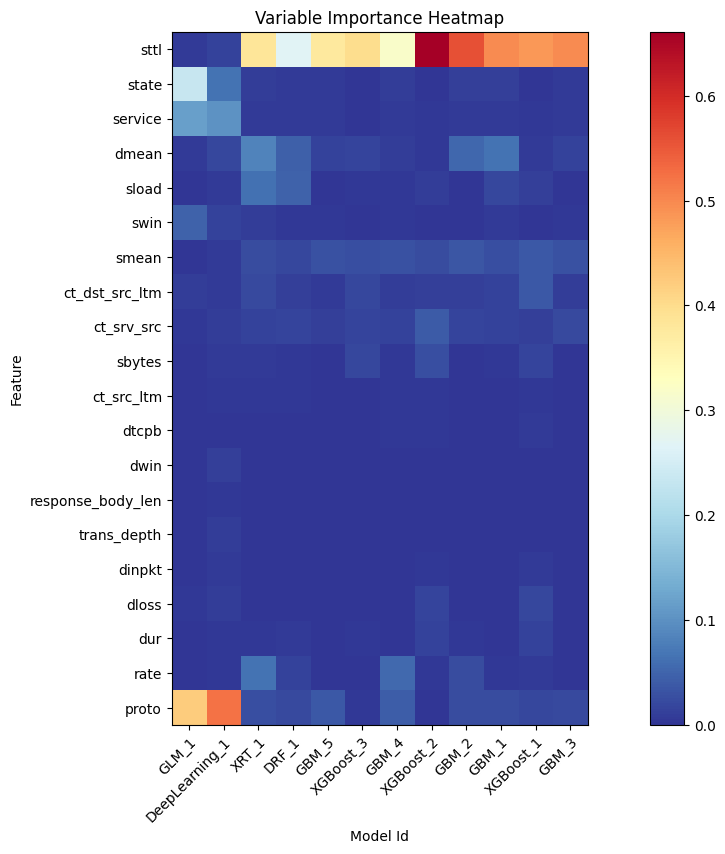

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

/home/markel/TFM Ciber/Prueba/venv/lib/python3.10/site-packages/h2o/job.py:81: UserWarning: Test/Validation dataset column 'state' has levels not trained on: ["ACC", "CLO"]
  warnings.warn(w)


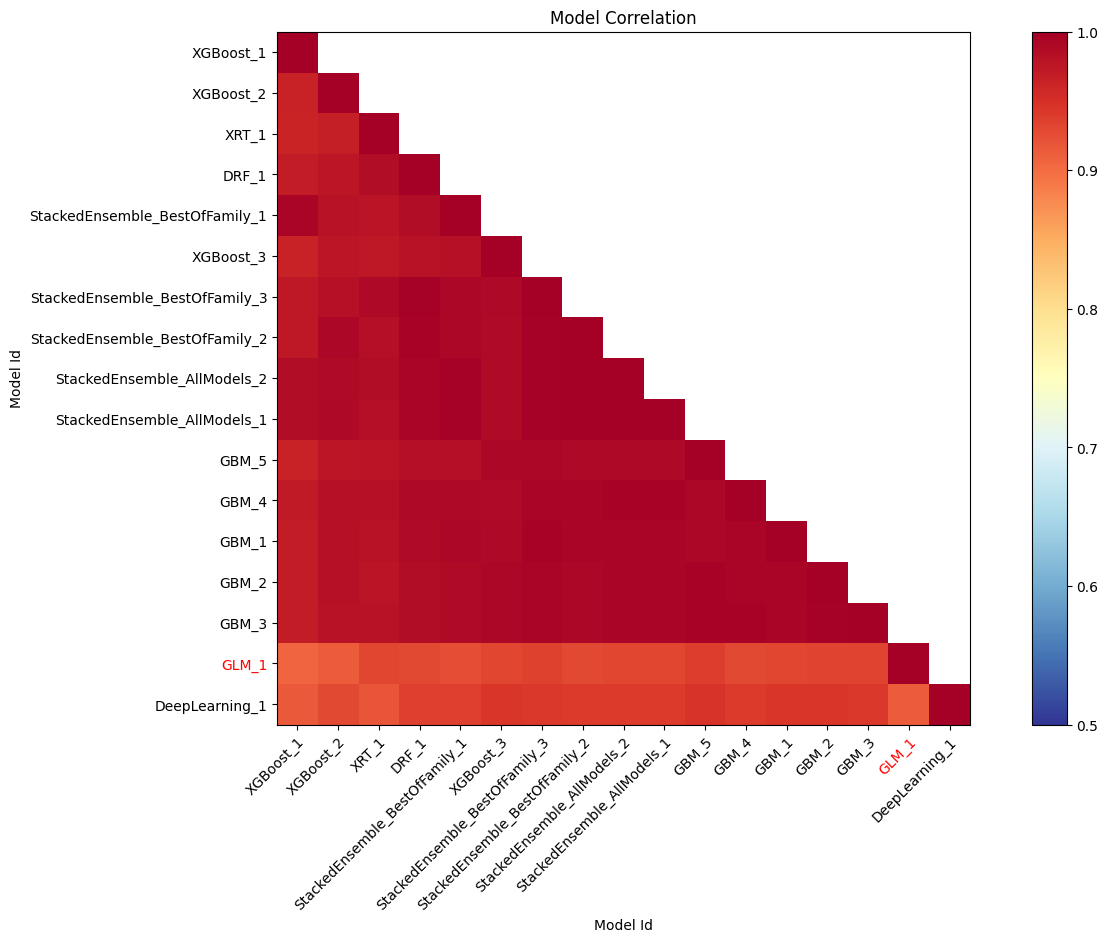

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

/home/markel/TFM Ciber/Prueba/venv/lib/python3.10/site-packages/h2o/job.py:81: UserWarning: Test/Validation dataset column 'state' has levels not trained on: ["ACC", "CLO"]
  warnings.warn(w)


H2OResponseError: Server error java.lang.IllegalArgumentException:
  Error: Incorrect number of arguments; 'cols_py' expects 2 but was passed 3
  Request: POST /99/Rapids
    data: {'ast': "(tmp= py_79_sid_9693 (levels (tmp= py_78_sid_9693 (as.factor (cols_py py_77_sid_9693 np.str_('proto'))))))", 'session_id': '_sid_9693'}


In [11]:
aml.explain(valid)